In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from PIL import Image
import numpy as np

Using TensorFlow backend.


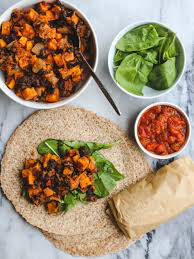

In [2]:
Image.open('/kaggle/input/waste-classification-data/dataset/DATASET/TEST/O/O_13191.jpg')

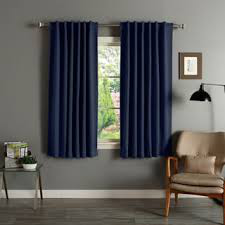

In [3]:
Image.open('/kaggle/input/waste-classification-data/dataset/DATASET/TEST/R/R_10045.jpg')

In [4]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3),
                      activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                   metrics = ['accuracy'])

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [6]:
training_set = train_datagen.flow_from_directory('/kaggle/input/waste-classification-data/dataset/DATASET/TRAIN',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/kaggle/input/waste-classification-data/dataset/DATASET/TEST',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [7]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 706,
                         epochs = 4,
                         validation_data = test_set,
                         validation_steps = 2000)

Epoch 1/4
706/706 [==============================] - 196s 278ms/step - loss: 0.4228 - accuracy: 0.8132 - val_loss: 0.3569 - val_accuracy: 0.8440
Epoch 2/4
706/706 [==============================] - 182s 257ms/step - loss: 0.3677 - accuracy: 0.8436 - val_loss: 0.2390 - val_accuracy: 0.8800
Epoch 3/4
706/706 [==============================] - 179s 253ms/step - loss: 0.3350 - accuracy: 0.8567 - val_loss: 0.2731 - val_accuracy: 0.8877
Epoch 4/4
706/706 [==============================] - 179s 254ms/step - loss: 0.3072 - accuracy: 0.8703 - val_loss: 0.2380 - val_accuracy: 0.8814


In [8]:
# organic image
test_image = image.load_img('/kaggle/input/waste-classification-data/dataset/DATASET/TEST/O/O_13191.jpg',
                            target_size = (64, 64))

In [9]:
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)

In [10]:
training_set.class_indices

{'O': 0, 'R': 1}

In [11]:
if result[0][0] == 1:
    prediction = 'Recyclable'
else:
    prediction = 'Organic'

In [12]:
prediction

'Organic'